In [1]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

In [2]:
np.random.seed(0)

In [3]:
N = 100
mu = 0.2
sigma = 1
x = np.random.randn(N)*sigma + mu

In [4]:
#two sided test
#is x from N(0,1)?
ztest(x)

(2.5648404153513686, 0.01032232684881584)

In [5]:
#two-sided test
#is x from N(0,1)
mu_hat = x.mean()
sigma_hat = x.std(ddof = 1)
z = mu_hat / (sigma_hat / np.sqrt(N))
p_rt = 1 - norm.cdf(np.abs(z))
p_lf = norm.cdf(-np.abs(z))
p = p_rt + p_lf
z, p

(2.564840415351368, 0.010322326848815901)

In [12]:
# numm with diff mu to compare x to
mu0 = 0.2
ztest(x, value = mu0)

(0.5904283402851699, 0.5549035151647227)

In [13]:
#two-sided test
#is x mean diff than mu0
mu_hat = x.mean()
sigma_hat = x.std(ddof = 1)
z = (mu_hat - mu0) / (sigma_hat / np.sqrt(N))
p_rt = 1 - norm.cdf(np.abs(z))
p_lf = norm.cdf(-np.abs(z))
p = p_rt + p_lf
z, p

(0.5904283402851698, 0.5549035151647228)

In [23]:
#one sided 
#is x greater than 0
ztest(x, alternative = 'larger')

(2.5648404153513686, 0.00516116342440792)

In [22]:
#one sided 
#is x greater than 0
mu_hat = x.mean()
sigma_hat = x.std(ddof = 1)
z = mu_hat / (sigma_hat / np.sqrt(N))
p = 1 - norm.cdf(z)
z, p

(2.564840415351368, 0.005161163424407977)

In [8]:
#one sided 
#is x less than 0
ztest(x, alternative = 'smaller')

(2.5648404153513686, 0.9948388365755921)

In [11]:
#one sided 
#is x less than 0
mu_hat = x.mean()
sigma_hat = x.std(ddof = 1)
z = mu_hat / (sigma_hat / np.sqrt(N))
p = norm.cdf(z)
z, p

(2.564840415351368, 0.994838836575592)

In [15]:
#two sample two sided test
#is x1 the same as x2
N1 = 100
mu1 = 0.2
sigma1 = 1
x1 = np.random.randn(N1)*sigma1 + mu1

N2 = 100
mu2 = 0.5
sigma2 = 1
x2 = np.random.randn(N2)*sigma2 + mu2

ztest(x1, x2)

(-3.4596690589176347, 0.0005408396500607681)

In [16]:
#two sided test implementation
mu_hat1 = x1.mean()
mu_hat2 = x2.mean()
dmu_hat = mu_hat1 - mu_hat2
s2_hat1 = x1.var(ddof=1)
s2_hat2 = x2.var(ddof=1)
s_hat = np.sqrt(s2_hat1 / N1 + s2_hat2 / N2)
z = dmu_hat / s_hat
p_rt = 1 - norm.cdf(np.abs(z))
p_lf = norm.cdf(-np.abs(z))
p = p_rt + p_lf
z, p

(-3.4596690589176347, 0.0005408396500607832)

In [20]:
#one sided test implementation
#is x1 larger than x2
mu_hat1 = x1.mean()
mu_hat2 = x2.mean()
dmu_hat = mu_hat1 - mu_hat2
s2_hat1 = x1.var(ddof=1)
s2_hat2 = x2.var(ddof=1)
s_hat = np.sqrt(s2_hat1 / N1 + s2_hat2 / N2)
z = dmu_hat / s_hat
p = 1 - norm.cdf(z)
z, p

(-3.4596690589176347, 0.9997295801749696)

In [25]:
ztest(x1, x2, alternative = 'smaller')

(-3.4596690589176347, 0.00027041982503038406)

In [21]:
#one sided test implementation
#is x1 smaller than x2
mu_hat1 = x1.mean()
mu_hat2 = x2.mean()
dmu_hat = mu_hat1 - mu_hat2
s2_hat1 = x1.var(ddof=1)
s2_hat2 = x2.var(ddof=1)
s_hat = np.sqrt(s2_hat1 / N1 + s2_hat2 / N2)
z = dmu_hat / s_hat
p = norm.cdf(z)
z, p

(-3.4596690589176347, 0.00027041982503038406)

In [28]:
ztest(x2, x1, alternative = 'larger')

(3.4596690589176347, 0.00027041982503038406)

In [29]:
#one sided test implementation
#is x2 larger than x1?
mu_hat1 = x1.mean()
mu_hat2 = x2.mean()
dmu_hat = mu_hat2 - mu_hat1
s2_hat1 = x1.var(ddof=1)
s2_hat2 = x2.var(ddof=1)
s_hat = np.sqrt(s2_hat1 / N1 + s2_hat2 / N2)
z = dmu_hat / s_hat
p = 1 - norm.cdf(z)
z, p

(3.4596690589176347, 0.0002704198250303991)

In [38]:
#test will we reject null hyp when the null is true 5% of the time
def test():
    x1 = np.random.rand(100)
    x2 = np.random.rand(100)
    
    x, p = ztest(x1,x2)
    return p
    
results = [1 if test() < 0.05 else 0 for i in range(10000) ]

np.mean(results)

0.0551

In [40]:
#apply ztest to real data
import pandas as pd

df = pd.read_csv("https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv")

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df[df['Survived'] ==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
x1 = df[df['Survived'] ==1]['Fare'].dropna().to_numpy()
x2 = df[df['Survived'] ==0]['Fare'].dropna().to_numpy()

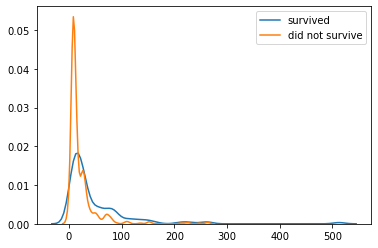

In [46]:
sns.kdeplot(x1, label = 'survived')
sns.kdeplot(x2, label = 'did not survive')
plt.legend()

In [47]:
x1.mean(), x2.mean()

(48.39540760233918, 22.117886885245902)

In [48]:
ztest(x1,x2)

(7.939191660871055, 2.035031103573989e-15)

In [49]:
#did survivors pay more?
ztest(x1,x2, alternative = 'larger')

(7.939191660871055, 1.0175155517869944e-15)

In [51]:
#did survivors pay more?
ztest(x2,x1, alternative = 'smaller')

(-7.939191660871055, 1.0175155517869944e-15)

In [53]:
#calculate effect of ticket price on surivival
def cohend(d1, d2):
 # calculate the size of samples
 n1, n2 = len(d1), len(d2)
 # calculate the variance of the samples
 s1, s2 = np.var(d1, ddof=1),np.var(d2, ddof=1)
 # calculate the pooled standard deviation
 s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
 # calculate the means of the samples
 u1, u2 = np.mean(d1), np.mean(d2)
 # calculate the effect size
 return (u1 - u2) / s

cohend(x1,x2)

0.54691006153194

In [55]:
#ad click data z test
df = pd.read_csv("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/ab_testing/advertisement_clicks.csv")

In [56]:
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [57]:
x1 = df[df['advertisement_id'] == 'A']['action'].dropna().to_numpy()
x2 = df[df['advertisement_id'] == 'B']['action'].dropna().to_numpy()

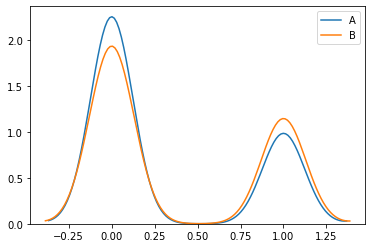

In [58]:
sns.kdeplot(x1, label = 'A')
sns.kdeplot(x2, label = 'B')
plt.legend()

In [59]:
ztest(x1,x2)

(-3.2211732138019786, 0.0012766696301529544)

In [60]:
#did a get more clicks than b
ztest(x1,x2, alternative = 'larger')

(-3.2211732138019786, 0.9993616651849235)

In [61]:
#did b get more clicks than a
ztest(x1,x2, alternative = 'smaller')

(-3.2211732138019786, 0.0006383348150764772)

In [62]:
#calculate effect of ticket price on surivival
def cohend(d1, d2):
 # calculate the size of samples
 n1, n2 = len(d1), len(d2)
 # calculate the variance of the samples
 s1, s2 = np.var(d1, ddof=1),np.var(d2, ddof=1)
 # calculate the pooled standard deviation
 s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
 # calculate the means of the samples
 u1, u2 = np.mean(d1), np.mean(d2)
 # calculate the effect size
 return (u1 - u2) / s

cohend(x1,x2)

-0.14405524546725373

In [63]:
cohend(x2,x1)

0.14405524546725373